In [1]:
import numpy as np
import leopardgecko as lg

In [2]:
hvectors = lg.hvectstatstools.get_hvect_combinations(3,12)
hvectors

[(0, 0, 12),
 (0, 1, 11),
 (0, 2, 10),
 (0, 3, 9),
 (0, 4, 8),
 (0, 5, 7),
 (0, 6, 6),
 (0, 7, 5),
 (0, 8, 4),
 (0, 9, 3),
 (0, 10, 2),
 (0, 11, 1),
 (0, 12, 0),
 (1, 0, 11),
 (1, 1, 10),
 (1, 2, 9),
 (1, 3, 8),
 (1, 4, 7),
 (1, 5, 6),
 (1, 6, 5),
 (1, 7, 4),
 (1, 8, 3),
 (1, 9, 2),
 (1, 10, 1),
 (1, 11, 0),
 (2, 0, 10),
 (2, 1, 9),
 (2, 2, 8),
 (2, 3, 7),
 (2, 4, 6),
 (2, 5, 5),
 (2, 6, 4),
 (2, 7, 3),
 (2, 8, 2),
 (2, 9, 1),
 (2, 10, 0),
 (3, 0, 9),
 (3, 1, 8),
 (3, 2, 7),
 (3, 3, 6),
 (3, 4, 5),
 (3, 5, 4),
 (3, 6, 3),
 (3, 7, 2),
 (3, 8, 1),
 (3, 9, 0),
 (4, 0, 8),
 (4, 1, 7),
 (4, 2, 6),
 (4, 3, 5),
 (4, 4, 4),
 (4, 5, 3),
 (4, 6, 2),
 (4, 7, 1),
 (4, 8, 0),
 (5, 0, 7),
 (5, 1, 6),
 (5, 2, 5),
 (5, 3, 4),
 (5, 4, 3),
 (5, 5, 2),
 (5, 6, 1),
 (5, 7, 0),
 (6, 0, 6),
 (6, 1, 5),
 (6, 2, 4),
 (6, 3, 3),
 (6, 4, 2),
 (6, 5, 1),
 (6, 6, 0),
 (7, 0, 5),
 (7, 1, 4),
 (7, 2, 3),
 (7, 3, 2),
 (7, 4, 1),
 (7, 5, 0),
 (8, 0, 4),
 (8, 1, 3),
 (8, 2, 2),
 (8, 3, 1),
 (8, 4, 0),
 (9, 0, 3),
 (9,

In [3]:
len(hvectors)

91

In [4]:
#Create random np array with number of predictions
#rand_h = np.random.randint(0,len(hvectors),size=(128,128,128)) #
rand_h = np.random.randint(0,len(hvectors)-2,size=(128,128,128)) #exclude the two last hvectors to test the 'masked' issue

In [5]:
#data_all = np.zeros((3, 128,128,128), dtype=np.uint8)

def get_h(i):
    return np.array(hvectors[i])

get_h_vect = np.vectorize(get_h, signature='()->(m)')

data_all = get_h_vect(rand_h)

In [6]:
data_all.shape

(128, 128, 128, 3)

In [7]:
data_all= np.transpose(data_all, (3,0,1,2))

In [8]:
data_all.shape

(3, 128, 128, 128)

In [9]:
data_all[:,0,0,0]

array([3, 1, 8])

In [10]:
#Create random np array for ground truth
data_gnd = np.random.randint(0,3,size=(128,128,128))
data_gnd

array([[[0, 0, 1, ..., 1, 2, 1],
        [1, 1, 1, ..., 0, 0, 1],
        [0, 0, 1, ..., 2, 0, 0],
        ...,
        [0, 2, 0, ..., 1, 2, 1],
        [0, 1, 0, ..., 2, 1, 2],
        [1, 2, 2, ..., 2, 0, 2]],

       [[2, 2, 0, ..., 1, 2, 2],
        [0, 0, 1, ..., 2, 0, 0],
        [2, 2, 1, ..., 0, 0, 0],
        ...,
        [2, 0, 0, ..., 2, 2, 0],
        [2, 0, 1, ..., 0, 1, 1],
        [0, 2, 1, ..., 2, 1, 0]],

       [[1, 2, 1, ..., 1, 0, 2],
        [2, 1, 1, ..., 1, 2, 1],
        [0, 2, 1, ..., 1, 1, 0],
        ...,
        [0, 0, 2, ..., 0, 2, 2],
        [0, 1, 0, ..., 0, 2, 1],
        [2, 1, 1, ..., 0, 1, 1]],

       ...,

       [[0, 0, 0, ..., 2, 0, 0],
        [1, 2, 0, ..., 2, 1, 1],
        [1, 1, 2, ..., 2, 0, 1],
        ...,
        [2, 2, 1, ..., 2, 1, 1],
        [2, 0, 0, ..., 2, 1, 0],
        [1, 1, 1, ..., 1, 0, 2]],

       [[2, 1, 0, ..., 0, 2, 1],
        [2, 0, 2, ..., 0, 0, 0],
        [0, 1, 0, ..., 0, 0, 1],
        ...,
        [0, 2, 1, ..., 

## counting stats

In [11]:
hvect_count_in_data0, hvect_count_in_data0_max = lg.hvectstatstools.hvect_count_in_data(data_all, hvectors)

In [12]:
hvect_count_in_data0

{(0, 0, 12): 23412,
 (0, 1, 11): 23756,
 (0, 2, 10): 23429,
 (0, 3, 9): 23539,
 (0, 4, 8): 23397,
 (0, 5, 7): 23431,
 (0, 6, 6): 23435,
 (0, 7, 5): 23349,
 (0, 8, 4): 23299,
 (0, 9, 3): 23777,
 (0, 10, 2): 23663,
 (0, 11, 1): 23522,
 (0, 12, 0): 23298,
 (1, 0, 11): 23369,
 (1, 1, 10): 23772,
 (1, 2, 9): 23632,
 (1, 3, 8): 23615,
 (1, 4, 7): 23596,
 (1, 5, 6): 23533,
 (1, 6, 5): 23481,
 (1, 7, 4): 23431,
 (1, 8, 3): 23341,
 (1, 9, 2): 23894,
 (1, 10, 1): 23488,
 (1, 11, 0): 23575,
 (2, 0, 10): 23641,
 (2, 1, 9): 23799,
 (2, 2, 8): 23442,
 (2, 3, 7): 23689,
 (2, 4, 6): 23640,
 (2, 5, 5): 23517,
 (2, 6, 4): 23797,
 (2, 7, 3): 23526,
 (2, 8, 2): 23476,
 (2, 9, 1): 23483,
 (2, 10, 0): 23682,
 (3, 0, 9): 23265,
 (3, 1, 8): 23591,
 (3, 2, 7): 23411,
 (3, 3, 6): 23319,
 (3, 4, 5): 23624,
 (3, 5, 4): 23408,
 (3, 6, 3): 23811,
 (3, 7, 2): 23605,
 (3, 8, 1): 23622,
 (3, 9, 0): 23537,
 (4, 0, 8): 23244,
 (4, 1, 7): 23653,
 (4, 2, 6): 23407,
 (4, 3, 5): 23442,
 (4, 4, 4): 23702,
 (4, 5, 3): 23593,


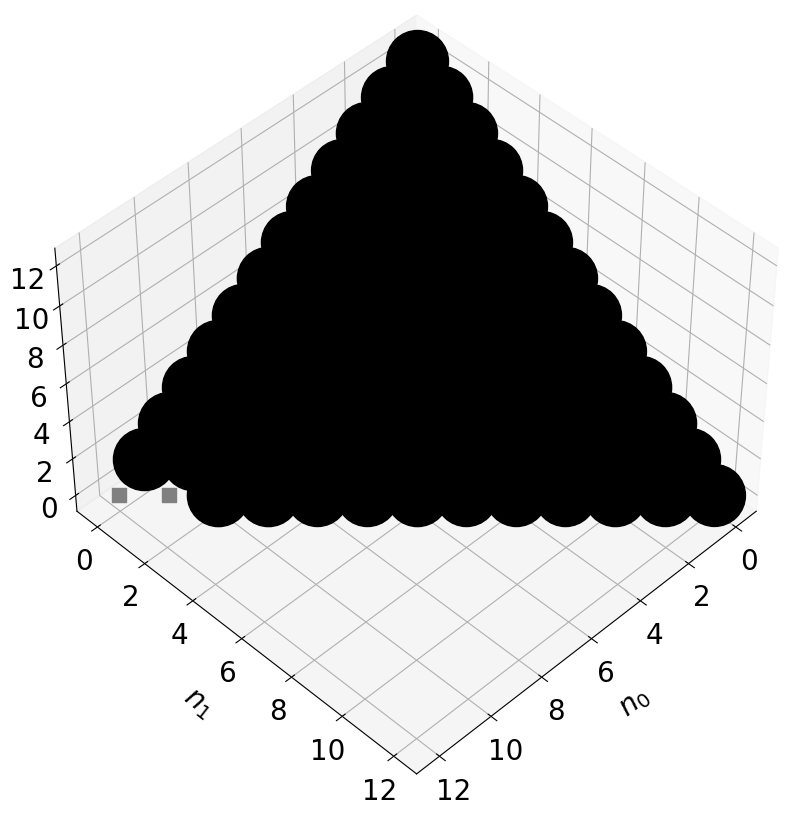

In [13]:
lg.hvect_plot_3class.plot_hvect_count_3class(hvect_count_in_data0, hvect_count_in_data0_max)

## Compare with ground truth

In [14]:
hvect_gndclass_count_in_data0 = lg.hvectstatstools.hvect_gndclass_counter(data_all, data_gnd, hvectors) #old version

In [15]:
hvect_gndclass_count_in_data0

{(0, 0, 12): [7800, 7817, 7795],
 (0, 1, 11): [7924, 7960, 7872],
 (0, 2, 10): [7748, 7811, 7870],
 (0, 3, 9): [7724, 8004, 7811],
 (0, 4, 8): [7826, 7681, 7890],
 (0, 5, 7): [7861, 7861, 7709],
 (0, 6, 6): [7920, 7739, 7776],
 (0, 7, 5): [7717, 7901, 7731],
 (0, 8, 4): [7928, 7750, 7621],
 (0, 9, 3): [7893, 7966, 7918],
 (0, 10, 2): [7957, 7864, 7842],
 (0, 11, 1): [7859, 7749, 7914],
 (0, 12, 0): [7806, 7800, 7692],
 (1, 0, 11): [7794, 7819, 7756],
 (1, 1, 10): [8015, 7841, 7916],
 (1, 2, 9): [7913, 7904, 7815],
 (1, 3, 8): [7921, 7764, 7930],
 (1, 4, 7): [7894, 7807, 7895],
 (1, 5, 6): [7862, 7830, 7841],
 (1, 6, 5): [7932, 7761, 7788],
 (1, 7, 4): [7725, 7741, 7965],
 (1, 8, 3): [7850, 7845, 7646],
 (1, 9, 2): [8004, 7882, 8008],
 (1, 10, 1): [7745, 7893, 7850],
 (1, 11, 0): [7845, 7872, 7858],
 (2, 0, 10): [7871, 7821, 7949],
 (2, 1, 9): [7953, 7934, 7912],
 (2, 2, 8): [7783, 7647, 8012],
 (2, 3, 7): [7931, 7909, 7849],
 (2, 4, 6): [7891, 7833, 7916],
 (2, 5, 5): [7903, 7787, 7827

In [16]:
#Try the new version
hvect_gndclass_count_in_data1 = lg.hvectstatstools.hvect_gndclass_counter1(data_all, data_gnd, hvectors)
hvect_gndclass_count_in_data1

hvector: (0, 0, 12)
hvector: (0, 1, 11)
hvector: (0, 2, 10)
hvector: (0, 3, 9)
hvector: (0, 4, 8)
hvector: (0, 5, 7)
hvector: (0, 6, 6)
hvector: (0, 7, 5)
hvector: (0, 8, 4)
hvector: (0, 9, 3)
hvector: (0, 10, 2)
hvector: (0, 11, 1)
hvector: (0, 12, 0)
hvector: (1, 0, 11)
hvector: (1, 1, 10)
hvector: (1, 2, 9)
hvector: (1, 3, 8)
hvector: (1, 4, 7)
hvector: (1, 5, 6)
hvector: (1, 6, 5)
hvector: (1, 7, 4)
hvector: (1, 8, 3)
hvector: (1, 9, 2)
hvector: (1, 10, 1)
hvector: (1, 11, 0)
hvector: (2, 0, 10)
hvector: (2, 1, 9)
hvector: (2, 2, 8)
hvector: (2, 3, 7)
hvector: (2, 4, 6)
hvector: (2, 5, 5)
hvector: (2, 6, 4)
hvector: (2, 7, 3)
hvector: (2, 8, 2)
hvector: (2, 9, 1)
hvector: (2, 10, 0)
hvector: (3, 0, 9)
hvector: (3, 1, 8)
hvector: (3, 2, 7)
hvector: (3, 3, 6)
hvector: (3, 4, 5)
hvector: (3, 5, 4)
hvector: (3, 6, 3)
hvector: (3, 7, 2)
hvector: (3, 8, 1)
hvector: (3, 9, 0)
hvector: (4, 0, 8)
hvector: (4, 1, 7)
hvector: (4, 2, 6)
hvector: (4, 3, 5)
hvector: (4, 4, 4)
hvector: (4, 5, 3)


{(0, 0, 12): [7800, 7817, 7795],
 (0, 1, 11): [7924, 7960, 7872],
 (0, 2, 10): [7748, 7811, 7870],
 (0, 3, 9): [7724, 8004, 7811],
 (0, 4, 8): [7826, 7681, 7890],
 (0, 5, 7): [7861, 7861, 7709],
 (0, 6, 6): [7920, 7739, 7776],
 (0, 7, 5): [7717, 7901, 7731],
 (0, 8, 4): [7928, 7750, 7621],
 (0, 9, 3): [7893, 7966, 7918],
 (0, 10, 2): [7957, 7864, 7842],
 (0, 11, 1): [7859, 7749, 7914],
 (0, 12, 0): [7806, 7800, 7692],
 (1, 0, 11): [7794, 7819, 7756],
 (1, 1, 10): [8015, 7841, 7916],
 (1, 2, 9): [7913, 7904, 7815],
 (1, 3, 8): [7921, 7764, 7930],
 (1, 4, 7): [7894, 7807, 7895],
 (1, 5, 6): [7862, 7830, 7841],
 (1, 6, 5): [7932, 7761, 7788],
 (1, 7, 4): [7725, 7741, 7965],
 (1, 8, 3): [7850, 7845, 7646],
 (1, 9, 2): [8004, 7882, 8008],
 (1, 10, 1): [7745, 7893, 7850],
 (1, 11, 0): [7845, 7872, 7858],
 (2, 0, 10): [7871, 7821, 7949],
 (2, 1, 9): [7953, 7934, 7912],
 (2, 2, 8): [7783, 7647, 8012],
 (2, 3, 7): [7931, 7909, 7849],
 (2, 4, 6): [7891, 7833, 7916],
 (2, 5, 5): [7903, 7787, 7827

Working OK

## old stuff


Try line-by-line

In [17]:
h0= hvectors[4]
h0

(0, 4, 8)

In [ ]:
d_h0_locs=None
for i, h0_el in enumerate(h0):
    if i==0: # initialise for the first class
        d_h0_locs = (data_all[i,:,:,:]==h0_el)
    else:
        d_h0_locs = ( ( data_all[i,:,:,:]==h0_el) & d_h0_locs )

In [ ]:
d_h0_locs

In [ ]:
np.sum(d_h0_locs)

In [ ]:
masked_gnd = np.ma.masked_where(np.logical_not(d_h0_locs), data_gnd)

In [ ]:
masked_gnd

In [ ]:
nclasses=3
hvect_gndclass_counter1 = {}
for h0i in hvectors:
    d0= []
    for c0 in range(nclasses):
        d0.append(0)
    hvect_gndclass_counter1[ h0i ] = d0

for cl0 in range(3):
    count_in_gnd_for_cls = np.ma.sum(np.ma.where(masked_gnd==cl0,1,0))
    hvect_gndclass_counter1[ h0 ][cl0] += count_in_gnd_for_cls

In [ ]:
hvect_gndclass_counter1

OK